# Laboratory Task 4 – PyTorch Regression

Instruction: Train a linear regression model in PyTorch using a regression dataset. Use the following parameters.

- Criterion: MSE Loss
- Fully Connected Layers x 2
- Batch Size: 8
- Optimizer: SGD
- Epoch: 1000

In [1]:
# 1. Standard Imports
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. (Placeholder) Create a sample regression dataset
# This simulates loading a real dataset with 2 input features.
# The true relationship is: y = 5*x1 - 3*x2 + 1 + noise
X_train = torch.randn(200, 2) * 10
y_train = (5 * X_train[:, 0] - 3 * X_train[:, 1] + 1).view(-1, 1) + torch.randn(200, 1) * 3
train_dataset = TensorDataset(X_train, y_train)

In [3]:
# 3. Define Parameters from instructions
BATCH_SIZE = 8
EPOCHS = 1000
LEARNING_RATE = 0.0001

In [4]:
# 4. Create DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [5]:
# 5. Define the Model
# "Fully Connected Layers x 2" implies a network with one hidden layer and one output layer.
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(2, 16) # 2 input features, 16 hidden neurons
        self.layer2 = nn.Linear(16, 1) # 16 hidden neurons, 1 output value

    def forward(self, x):
        x = torch.relu(self.layer1(x)) # ReLU activation on the hidden layer
        x = self.layer2(x)
        return x

# Instantiate the model
model = RegressionModel()

In [6]:
# 6. Define Loss (Criterion) and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [7]:
# 7. Training Loop
losses = []
for epoch in range(EPOCHS):
    epoch_loss = 0.0
    for features, labels in train_loader:
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        
    losses.append(epoch_loss / len(train_loader)) # Log the average loss for the epoch

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {losses[-1]:.4f}')

Epoch [100/1000], Loss: 8.8373


Epoch [200/1000], Loss: 8.8473


Epoch [300/1000], Loss: 8.6127


Epoch [400/1000], Loss: 8.7601


Epoch [500/1000], Loss: 8.6284


Epoch [600/1000], Loss: 8.6890


Epoch [700/1000], Loss: 8.6583


Epoch [800/1000], Loss: 8.6132


Epoch [900/1000], Loss: 8.5364


Epoch [1000/1000], Loss: 8.5895


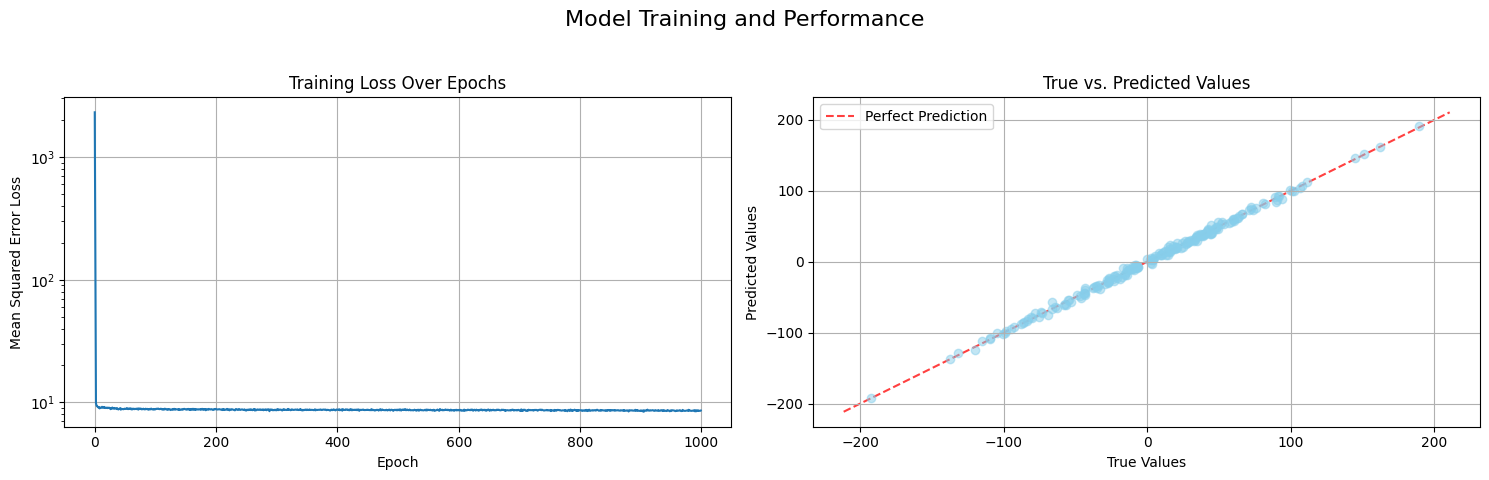

In [8]:
# 8. Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Model Training and Performance', fontsize=16)

# Plot 1: Loss Curve
ax1.plot(losses)
ax1.set_title("Training Loss Over Epochs")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Mean Squared Error Loss")
ax1.grid(True)

# Plot 2: True vs. Predicted Values
# Get predictions for the entire dataset
model.eval() # Set the model to evaluation mode
with torch.no_grad():
    y_pred = model(X_train)

ax2.scatter(y_train.numpy(), y_pred.numpy(), alpha=0.5, color='skyblue')
# Add a perfect prediction line (y=x) for reference
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),
    np.max([ax2.get_xlim(), ax2.get_ylim()]),
]
ax2.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Perfect Prediction')
ax2.set_title("True vs. Predicted Values")
ax2.set_xlabel("True Values")
ax2.set_ylabel("Predicted Values")
ax2.legend()
ax2.grid(True)
ax1.set_yscale('log')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Reflection
* This lab showcases the power of a deep learning framework like **PyTorch**, which automates the complex math of backpropagation.

* Instead of manual calculations, we define the key **building blocks**: the model architecture `(nn.Module)`, data handler `(DataLoader)`, loss function `(nn.MSELoss)`, and optimizer `(torch.optim.SGD)`.

* The **loss curve** visualization is a critical tool that confirms the model is learning by showing the error decreasing over time.

* The **true vs. predicted** plot provides a final evaluation of the model's performance, showing how closely its predictions align with the actual data.